# Stock Market Project 11/19/2021

The motivation behind this project is to have a starting value of $250000.00 and purchase stocks that would result in a profit. For me, this was a good starting point towards learning about stocks since I have very little experience. This model showcases the three tech stock prices that I have chose and the risk vs reward that the tech stocks provide.

The three stocks that I chose were Tesla, Apple, and Microsoft because these companies within the tech industry have been around for years as well as are companies that most competitive within the tech space. I have invested 10 shares per stock as a base starting point of this project.

To start off, we have to download and import the libraries that are required as well as get the dataset that is needed.

In [1]:
!pip install pandas_datareader
!pip install yfinance
!pip install yahoo-finance
!pip install datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as mplt
from pandas.plotting import scatter_matrix
from datetime import datetime
import yfinance as yf
from pandas_datareader import data as pdr
from pandas_datareader.data import DataReader

**Then, define a list of stocks to invest in and set a start date and end date that you would like to view the data from. In this example, I am looking at the stocks from Tesla, Apple, and Microsoft and I have defined the start date to being January 1, 2020 and the end date as November 19, 2021. There may be a more efficient way to define the dates, but for this model I just decided to hard code define them.**

In [2]:
syb_list = ['TSLA', 'AAPL', 'MSFT']

start_date = datetime.fromisoformat('2020-01-01')
end_date = datetime.fromisoformat('2021-11-19')

for stock_val in syb_list:
    globals()[stock_val] = DataReader(stock_val, 'yahoo', start_date, end_date)

**Then, I had created a graph to show the stocks based off of price and graphed this. As the graph shows, the price of stock has increased over time and had caused the value of one share to be expensive.**

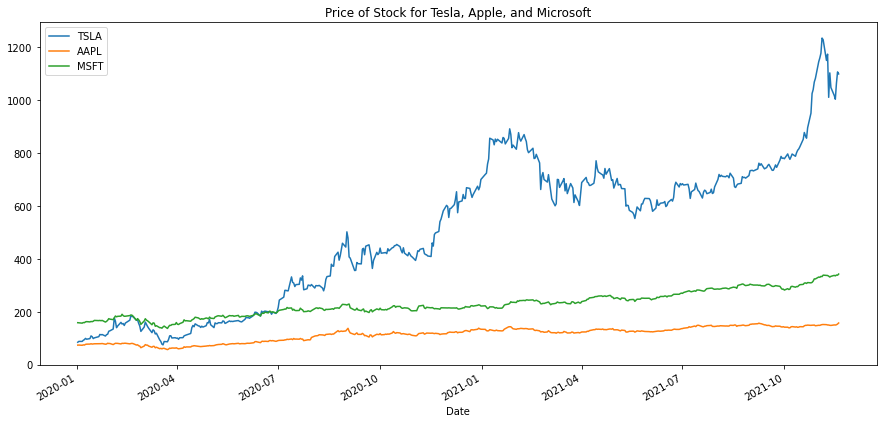

In [3]:
TSLA['Open'].plot(label='TSLA', figsize = (15,7))
AAPL['Open'].plot(label='AAPL')
MSFT['Open'].plot(label='MSFT')
mplt.title('Price of Stock for Tesla, Apple, and Microsoft')
mplt.legend()

In [4]:
syb = ['TSLA', 'AAPL', 'MSFT']

pdf = pd.DataFrame()
data_of_syb = []
for symbol in syb:
    pdf = pd.merge(pdf, pd.DataFrame(yf.download(symbol, fields='price', start=start_date, end=end_date)['Adj Close']), right_index=True, left_index=True, how='outer')
    
    data_of_syb.append(symbol)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**After this, we would like view the various fields of the table and analyze the risk vs reward that we get from investing in these stocks. The data that is currently important for this model is the standard deviation and the mean. The standard deviation and average returns of the stock help analyze the risk component of this model as shown below.** 

In [5]:
pdf.columns = data_of_syb
pdf.describe()

,TSLA,AAPL,MSFT
count,476.000000,476.000000,476.000000
mean,503.423650,114.259664,226.474317
std,274.829379,27.379915,47.519610
min,72.244003,55.402668,133.249496
25%,199.850994,88.529673,194.964554
50%,582.820007,121.213863,216.282043
75%,705.827484,134.056393,256.928307
max,1229.910034,157.869995,341.269989


Text(0, 0.5, 'Standard Deviation from Stock Symbol')

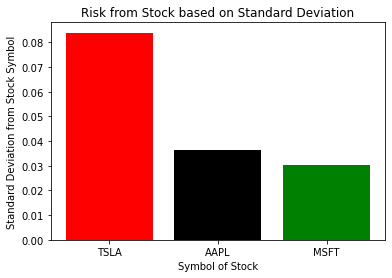

In [6]:
returns = pdf.pct_change(periods=3)
mplt.bar(returns.columns, returns.std(), color=['red', 'black', 'green'])
mplt.title("Risk from Stock based on Standard Deviation")
mplt.xlabel("Symbol of Stock")
mplt.ylabel("Standard Deviation from Stock Symbol")

Text(0, 0.5, 'Average Returns from Stock Symbol')

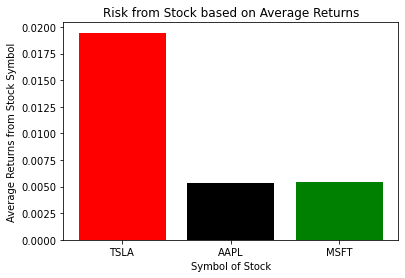

In [7]:
mplt.bar(returns.columns, returns.mean(), color=['red', 'black', 'green'])
mplt.title("Risk from Stock based on Average Returns")
mplt.xlabel("Symbol of Stock")
mplt.ylabel("Average Returns from Stock Symbol")

In [8]:
standard_deviation_vals = pd.DataFrame(returns.std())
sd_vals = standard_deviation_vals.rename(columns={0: 'standard deviation', **{'font-weight': 'bold'}})
mean_vals = pd.DataFrame(returns.mean())
m_vals = mean_vals.rename(columns={0: 'mean', **{'font-weight': 'bold'}})
print(sd_vals.head())
print(m_vals.head())

      standard deviation
TSLA            0.083909
AAPL            0.036328
MSFT            0.030345
          mean
TSLA  0.019465
AAPL  0.005346
MSFT  0.005393


**Based off of the values and bar graphs of the risk of the average returns and the standard deviation, we could see that these stocks are well worth investing for since they would be great for profitability in the future, but also pose a great amount of risk because of the increased fluctuation of price per share as well as the standard deviation of the stock being a greater value than the average return value of the stock.** 

# Stock Market Project 11/26/2021

For this week, based on the performance of the three stocks that I have invested in from last week to this week as well as analyzing the risk vs reward strategy, I have decided to work on a Monte Carlo Simulation using GBM as a way to alleviate the risk of investing in a stock and help determine whether sticking with the stocks that I have currently invested in would trend well in the future.

To start off, we have to download and import the libraries that are required as well as get the dataset that is needed.

In [9]:
!pip install seaborn
!pip install scipy
!pip install yfinance
!pip install yahoo-finance

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data as dr
from pandas_datareader.data import DataReader
from datetime import datetime
import yfinance as yf

In [10]:
syb = ['TSLA', 'AAPL', 'MSFT']

start_date = datetime.fromisoformat('2020-01-01')
end_date = datetime.fromisoformat('2021-11-26')

pdf = pd.DataFrame()
data_of_syb = []
for symbol in syb:
    pdf = pd.merge(pdf, pd.DataFrame(yf.download(symbol, fields='price', start=start_date, end=end_date)['Adj Close']), right_index=True, left_index=True, how='outer')
    
    data_of_syb.append(symbol)
    
print(pdf.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
            Adj Close_x  Adj Close_y   Adj Close
Date                                            
2020-01-02    86.052002    73.988480  157.615097
2020-01-03    88.601997    73.269157  155.652527
2020-01-06    90.307999    73.852974  156.054855
2020-01-07    93.811996    73.505646  154.631989
2020-01-08    98.428001    74.688072  157.095032


In [11]:
syb_list = ['TSLA', 'AAPL', 'MSFT']

start_date_2 = datetime.fromisoformat('2020-01-01')
end_date_2 = datetime.fromisoformat('2021-11-26')

for stock_val in syb_list:
    globals()[stock_val] = DataReader(stock_val, 'yahoo', start_date, end_date)

**Here, we define the return value that we can get based off of the three stocks that I am currently investing in and plotting based off Frequency of Returns.**

In [12]:
closing_price = DataReader(['TSLA', 'MSFT', 'AAPL'], 'yahoo', start_date_2, end_date_2)['Adj Close']

closing_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 481 entries, 2020-01-02 to 2021-11-26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TSLA    481 non-null    float64
 1   MSFT    481 non-null    float64
 2   AAPL    481 non-null    float64
dtypes: float64(3)
memory usage: 15.0 KB


In [13]:
def returns2(pdf):
    return closing_price.pct_change()

returns = returns2(pdf)
returns.dropna(inplace=True)
print(returns.head())

Symbols         TSLA      MSFT      AAPL
Date                                    
2020-01-03  0.029633 -0.012452 -0.009722
2020-01-06  0.019255  0.002585  0.007968
2020-01-07  0.038801 -0.009118 -0.004703
2020-01-08  0.049205  0.015928  0.016086
2020-01-09 -0.021945  0.012493  0.021241


C:\Users\default.DESKTOP-557BIKL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

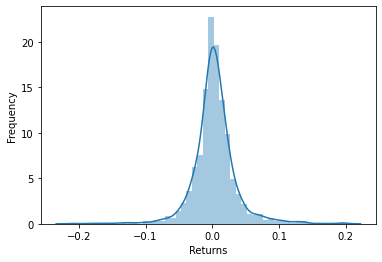

In [14]:
sns.distplot(returns.iloc[1:])
plt.xlabel("Returns")
plt.ylabel("Frequency")

**After this, I calculate the Monte Carlo Simulation using the GBM and plot the corresponding companies that I have invested in.**

In [15]:
num_of_days = 7
delta_t = 1/num_of_days

def monte_carlo_simulation(mean, std, num_of_days, start_price):
    # initialize variables to being zero
    price_val = np.zeros(num_of_days)
    price_val[0] = start_price
    shock_val = np.zeros(num_of_days)
    drift_val = np.zeros(num_of_days)
    
    for val in range(1,num_of_days):
        shock_val[val] = np.random.normal(loc = mean * delta_t, scale = std * np.sqrt(delta_t))
        drift_val[val] = mean * delta_t
        price_val[val] = price_val[val-1] + (price_val[val-1] * (drift_val[val] + shock_val[val]))
    return price_val

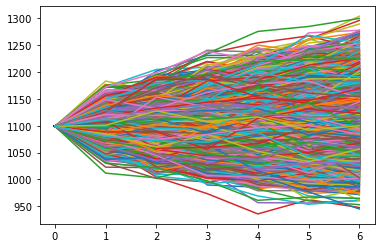

In [16]:
mean = returns.mean()['TSLA']
std = returns.std()['TSLA']
start_price = 1098.87

sim = np.zeros(10000)

for sim_run in range(10000):
    sim[sim_run] = monte_carlo_simulation(mean, std, num_of_days, start_price)[num_of_days-1]
    plt.plot(monte_carlo_simulation(mean, std, num_of_days, start_price))

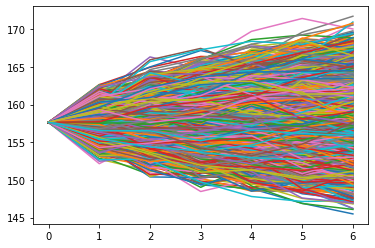

In [17]:
mean = returns.mean()['AAPL']
std = returns.std()['AAPL']
start_price = 157.65

sim = np.zeros(10000)

for sim_run in range(10000):
    sim[sim_run] = monte_carlo_simulation(mean, std, num_of_days, start_price)[num_of_days-1]
    plt.plot(monte_carlo_simulation(mean, std, num_of_days, start_price))

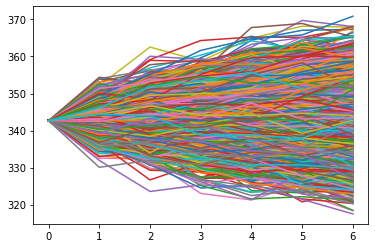

In [18]:
mean = returns.mean()['MSFT']
std = returns.std()['MSFT']
start_price = 342.64

sim = np.zeros(10000)

for sim_run in range(10000):
    sim[sim_run] = monte_carlo_simulation(mean, std, num_of_days, start_price)[num_of_days-1]
    plt.plot(monte_carlo_simulation(mean, std, num_of_days, start_price))

In conclusion, from creating the Monte Carlo Simulation with GBM and from the performance of the stock throughout the week, I have decided to sell 5 stocks from Microsoft since it took a hit during this week in the Stock Market and analyzing from the 10000 simulations of each stock that Microsoft's selling price from its initial selling price is much higher than the other two stocks, resulting in better profitability. This shows the idea of "Buy low, Sell High".